<a href="https://colab.research.google.com/github/Priyanshu-pandey1/PRODIGY_ML_02/blob/main/PRODIGY_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("/content/Mall_Customers.csv")

# Selecting features: Age, Annual Income, and Spending Score
X = df.iloc[:, [2, 3, 4]].values
print(f"Data Shape: {X.shape}")
df.head()

Data Shape: (200, 3)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


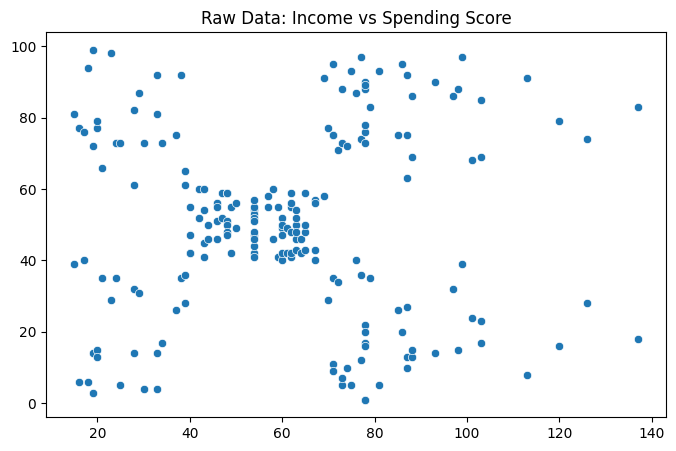

In [9]:
# Initial visualization (Income vs Spending)
plt.figure(figsize=(8,5))
sns.scatterplot(x=X[:,1], y=X[:,2])
plt.title("Raw Data: Income vs Spending Score")
plt.show()

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

print(f"PCA transformed shape: {pca_data.shape}")

PCA transformed shape: (200, 2)


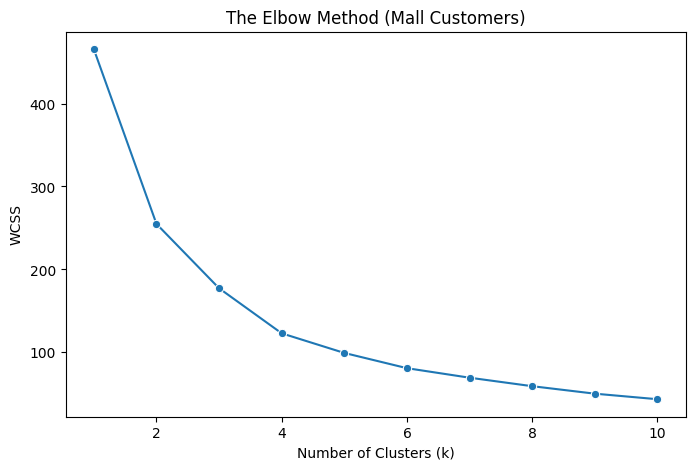

In [11]:
wcss = []
for k in range(1, 11):
    # Using n_init=10 to satisfy latest library updates as per your workflow
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o')
plt.title("The Elbow Method (Mall Customers)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

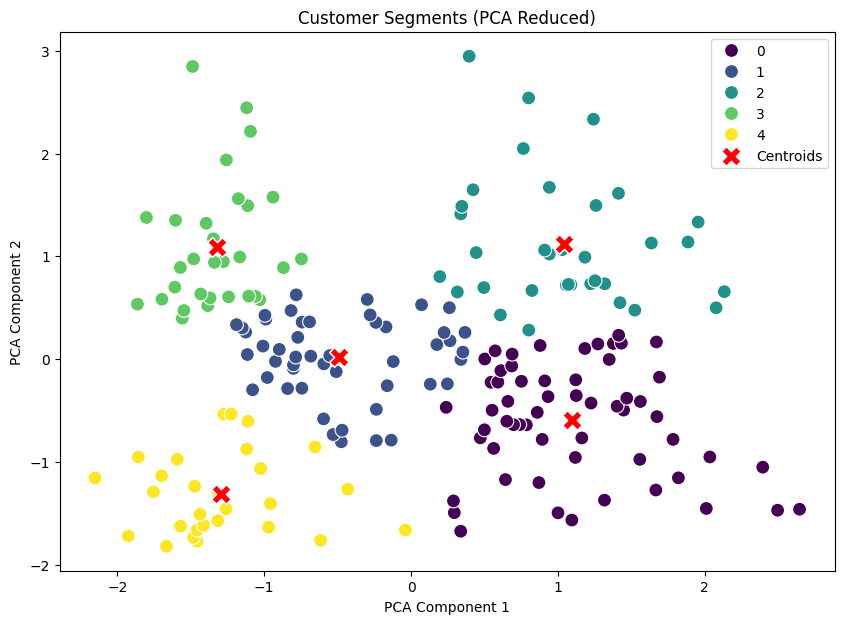

In [12]:
# Training the model
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
labels = kmeans.fit_predict(pca_data)

# Visualizing the final clusters
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=labels, palette='viridis', s=100)

# Plotting the Centroids (your red 'X' marker style)
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],
                marker="X", color="red", s=200, label="Centroids")

plt.title("Customer Segments (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()